In [1]:
from scipy.special import digamma
from scipy.constants import h, k as k_B, pi

In [2]:
from physics.mkid import model, noroozian

In [3]:
def iQi_TLS(F_TLS, delta_0, f, T, p=0):
    return F_TLS * delta_0 * np.tanh(h * f / (2 * k_B * T)) * (1 + p)**(-1/2)

def x_TLS(F_TLS, delta_0, f, T):
    return F_TLS * delta_0 / pi * (np.real(digamma(1 / 2 + h * f / (2j * pi * k_B * T))) -
                                   np.log(h * f / (k_B * T)))

In [12]:
T = np.linspace(0.001, 0.2, 1e3)
volume_multiplier = 1
nominal_skip_volume_um3 = 1870
f_r = 164e6
iQi0 = 4e-6

kid = model.KID(active_metal=model.Aluminum(T_c=0.73),
                active_volume_um3=volume_multiplier * nominal_skip_volume_um3,
                inactive_metal=None,
                inactive_volume_um3=0,
                substrate=model.Substrate(T=T),
                phonon_trapping_factor=1,
                alpha=0.3,
                f_r=f_r,
                iQc=20e-6,
                iQi0=iQi0,
                S_TLS_at_P_c=0,
                P_c=0)

Gamma_0 = 1e9
Gamma = Gamma_0 + kid.thermal_generation_rate()

In [5]:
x_color = 'blue'
i_color = 'brown'

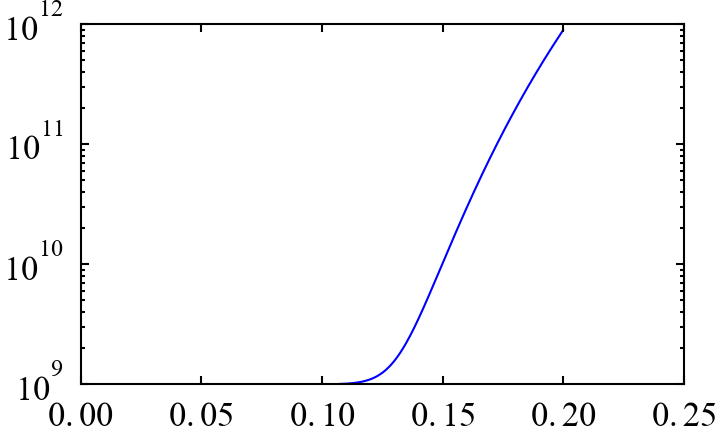

In [6]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(T, Gamma)

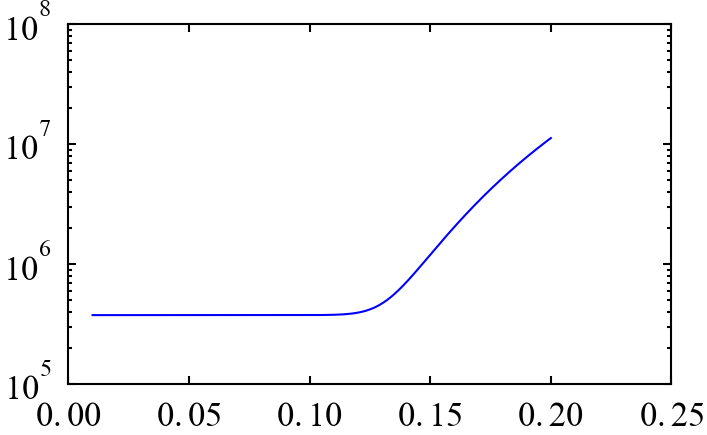

In [7]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(T, kid.N_qp(Gamma=Gamma))

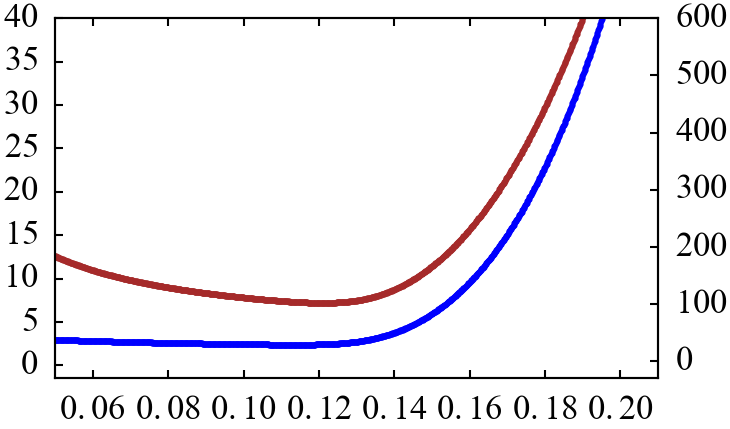

In [8]:
fig, i_ax = plt.subplots()
x_ax = i_ax.twinx()
x_ax.set_ylim(-30, 600)
i_ax.set_ylim(-1.5, 40)
x_ax.set_xlim(0.05, 0.21)
x_ax.plot(T, 1e6 * kid.x(Gamma=Gamma), '.', color=x_color)
i_ax.plot(T, 1e6 * kid.iQi(Gamma=Gamma), '.', color=i_color)

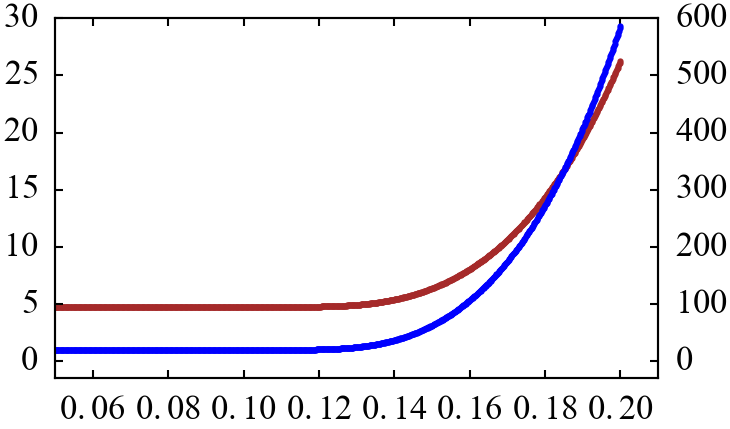

In [9]:
T_qp = 0.37
x = kid.d_x_d_N_qp(T_qp=T_qp) * kid.N_qp(Gamma=Gamma)
iQi = kid.d_iQi_d_N_qp(T_qp=T_qp) * kid.N_qp(Gamma=Gamma) + iQi0

fig, i_ax = plt.subplots()
x_ax = i_ax.twinx()
x_ax.set_ylim(-30, 600)
i_ax.set_ylim(-1.5, 30)
x_ax.set_xlim(0.05, 0.21)
x_ax.plot(T, 1e6 * x, '.', color=x_color)
i_ax.plot(T, 1e6 * iQi, '.', color=i_color)

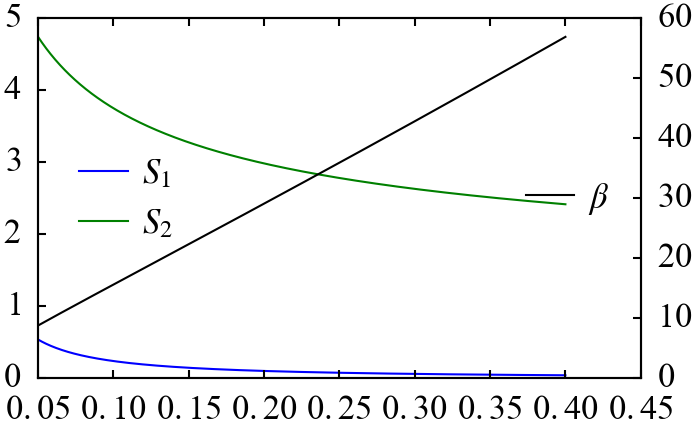

In [10]:
T_wide = np.linspace(0.05, 0.4, 1e3)
fig, ax = plt.subplots()
beta_ax = ax.twinx()
ax.plot(T_wide, kid.active_metal.S_1(f=f_r, T=T_wide), label='$S_1$')
ax.plot(T_wide, kid.active_metal.S_2(f=f_r, T=T_wide), label='$S_2$')
beta_ax.plot(T_wide, kid.active_metal.S_2(f=f_r, T=T_wide) / kid.active_metal.S_1(f=f_r, T=T_wide),
             color='k', label=r'$\beta$')
ax.legend(loc='center left')
beta_ax.legend(loc='center right');

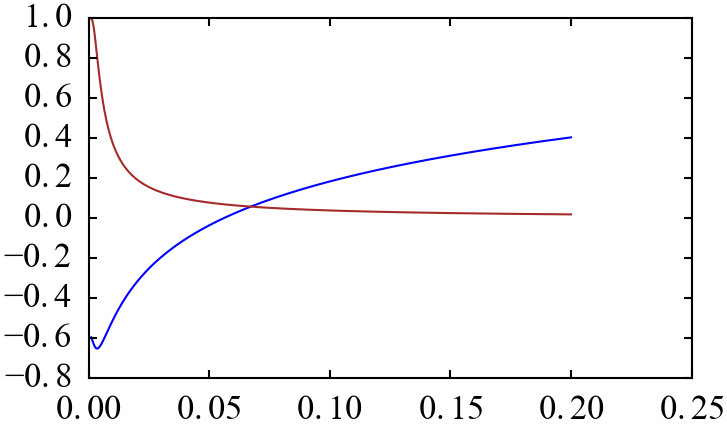

In [13]:
F_TLS = 1
delta_0 = 1
fig, ax = plt.subplots()
ax.plot(T, x_TLS(F_TLS=F_TLS, delta_0=delta_0, f=f_r, T=T), color=x_color)
ax.plot(T, iQi_TLS(F_TLS=F_TLS, delta_0=delta_0, f=f_r, T=T), color=i_color)